In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import matplotlib.gridspec as gridspec


def load(filename):
    fide = filename.split('.')[0].split('_')[1]
    fide = fide.upper()
    
    res = pd.read_csv(filename, delimiter=' ', header=None)
    res.columns = [fide, 'PBE', 'MAE', 'STD']
    return res

In [29]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])


def process(filename, savename=None):
    df = load(filename)
    plt.figure(figsize=(6, 5))
    plt.rcParams['font.size'] = 21
    plt.rcParams['font.family'] = "Arial"

    plt.rcParams['font.size'] = 21
    plt.rcParams['font.family'] = 'Arial'

    gs = gridspec.GridSpec(1, 2,width_ratios=[1,5.5], wspace=0.05)
    
    gs.update(left=0.17, right=0.94, bottom=.16,top=0.98)
    
    ax = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    #plt.yscale('log')
    ax.set_xscale('log')
    ax2.set_xscale('log')
    
    
    
    df.loc[df['PBE'] == 0, 'PBE'] = 0.1
    df2 = df
    fide = df2.columns[0]
    lr = LinearRegression(fit_intercept=True)
    ind = 0
    for i, group in df2.groupby(fide):
        ind2 = group['PBE'] > 0.2
        logx = np.log10(group['PBE'][ind2])

        lr.fit(logx[:, None], group['MAE'][ind2])
        if True:
            ax.errorbar(group['PBE'], group['MAE'], group['STD'], 
                         lw=2,
                         fmt='o',
                         capsize=5,
                         markerfacecolor='w',
                         markeredgewidth=2,
                         markersize=10,
                         color=colors[ind])
        if False:
            ax2.errorbar(group['PBE'], group['MAE'], group['STD'], 
                         lw=2,
                         fmt='o',
                         capsize=5,
                         markerfacecolor='w',
                         markeredgewidth=2,
                         markersize=10,
                         color=colors[ind], 
                     label='%d, $s$ = %.2f' % (
                         i, lr.coef_[0]
                     ))
        if False:
            ax.plot(group['PBE'], group['MAE'], 'o', 
                    markerFaceColor='w', 
                    markerSize=10, markeredgewidth=2, lw=2,
                    color=colors[ind])
        ax2.plot(group['PBE'], group['MAE'], 'o', 
                 markerSize=10, markeredgewidth=2, lw=2,
                 markerFaceColor='w',
                 label='%d, $s$ = %.2f' % (
                         i, lr.coef_[0]
                     ),
                 color=colors[ind])
        if False:
            ax.fill_between(group['PBE'], group['MAE'] - group['STD'], 
                            group['MAE'] + group['STD'], color=colors[ind],
                            alpha=0.1)
        ax2.fill_between(group['PBE'], group['MAE'] - group['STD'], 
                        group['MAE'] + group['STD'], color=colors[ind],
                        alpha=0.1)
                
        pred_y = lr.predict(logx[:, None])
        ax.plot(group['PBE'][ind2], pred_y, '--', color=colors[ind])
        ax2.plot(group['PBE'][ind2], pred_y, '--', color=colors[ind])
        ind += 1
        
    ax.set_xlim(0.05, 0.2)  # outliers only
    ax2.set_xlim(500, 45000)  # most of the data
    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

    r = 0.06
    ax.plot((1-d - r,1+d + r), (-d,+d), **kwargs)
    ax.plot((1-d - r,1+d + r),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d), (1-d,1+d), **kwargs)
    ax2.plot((-d,+d), (-d,+d), **kwargs)

    ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax.set_xticks([0.1])
    ax.set_xticklabels(['0'])
    ax2.set_xticks([1000, 5000, 41000])
    ax2.set_xticklabels([str(i) for i in [1000, 5000, 41000]])
    ax2.set_yticks([])
    
    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.set_ylim([0.3, 1.9])
    ax2.set_ylim([0.3, 1.9])
    

    if fide == 'GLLB':
        fide = 'GLLB-SC'
    if fide == "EXP":
        fide = 'Exp'
    ax2.legend(frameon=True,  fontsize=16, loc='upper right', 
               ncol=2, labelspacing=0.01,columnspacing=0.2,
               handletextpad = 0.1,
               borderpad=0.1, title=r'$N_{\mathregular{%s}}$' % fide, 
               title_fontsize=16)
    ax2.set_xlabel(r'$N_{\mathregular{PBE}}$' + '  ' * 5)
    ax.set_ylabel('MAE (eV)')
    plt.tight_layout()
    if savename is not None:
        plt.savefig(savename)

/Users/chenchi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


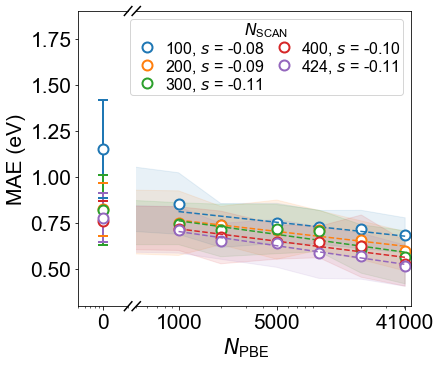

In [30]:
process('gga_scan.txt', 'gga_scan.pdf')

/Users/chenchi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


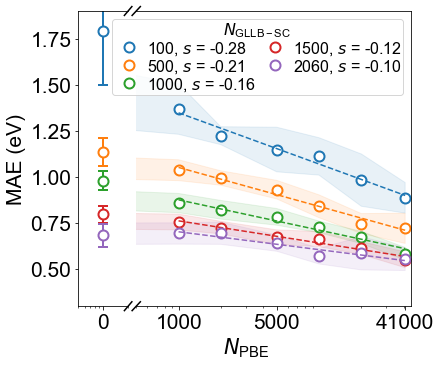

In [31]:
process('gga_gllb.txt', 'gga_gllb.pdf')

/Users/chenchi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


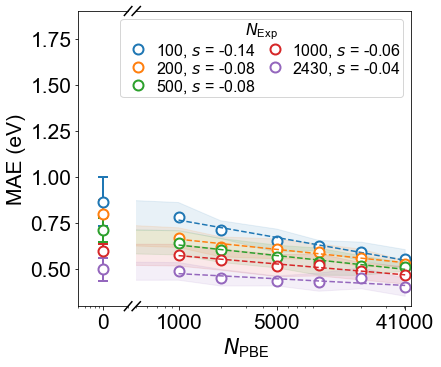

In [32]:
process('gga_exp.txt', 'gga_exp.pdf')

/Users/chenchi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


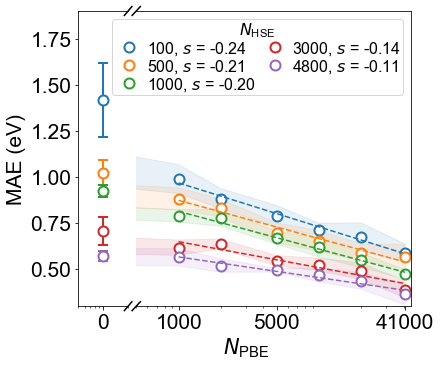

In [33]:
process('gga_hse.txt', 'gga_hse.pdf')